In [2]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
print(customers.describe())
print(products['Category'].value_counts())
print(transactions['Quantity'].describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64


In [5]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

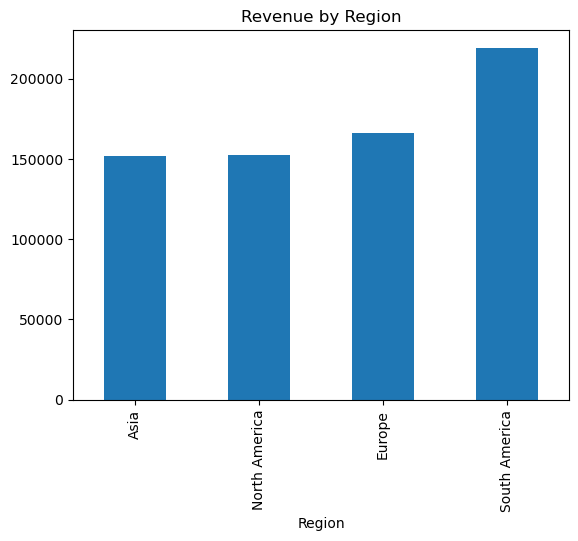

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values()
revenue_by_region.plot(kind='bar')
plt.title('Revenue by Region')
plt.show()

In [7]:
import missingno as msno

msno.matrix(customers)
msno.heatmap(transactions)

ModuleNotFoundError: No module named 'missingno'

In [8]:
pip install missingno


C:\Users\Tharun\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Tharun\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

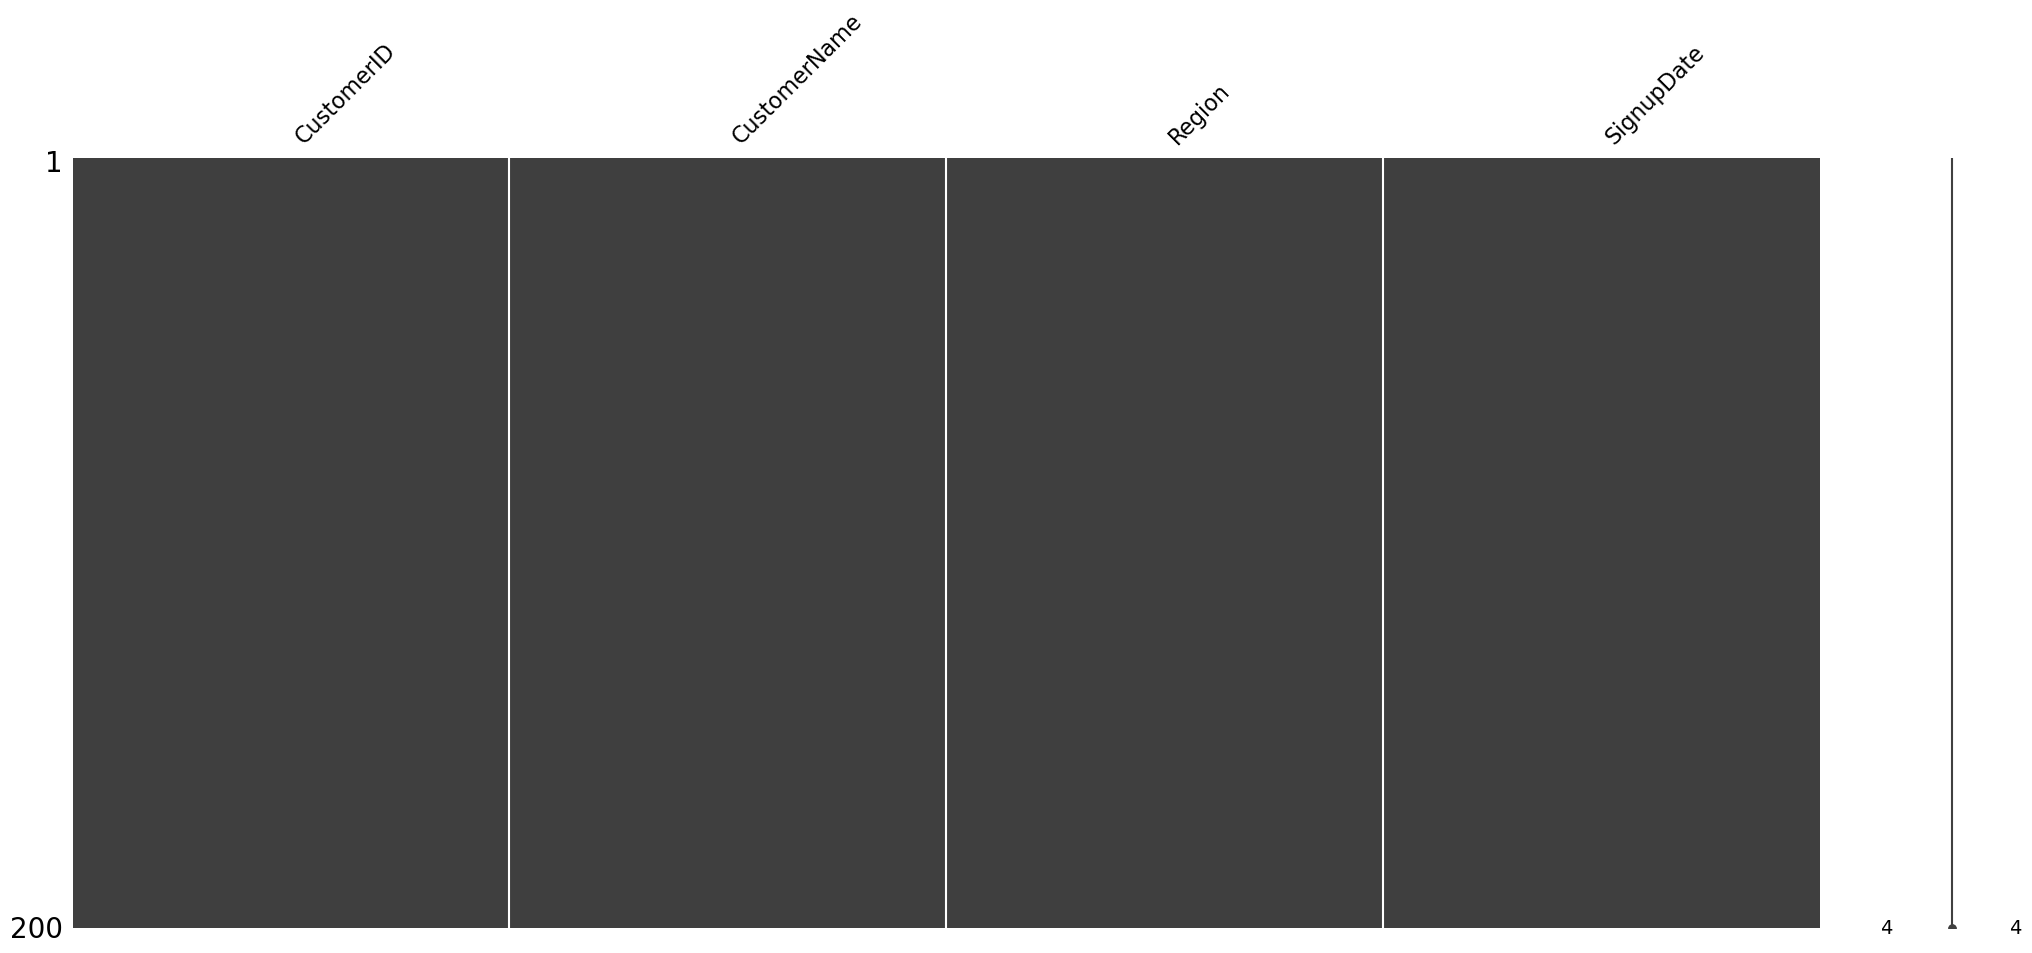

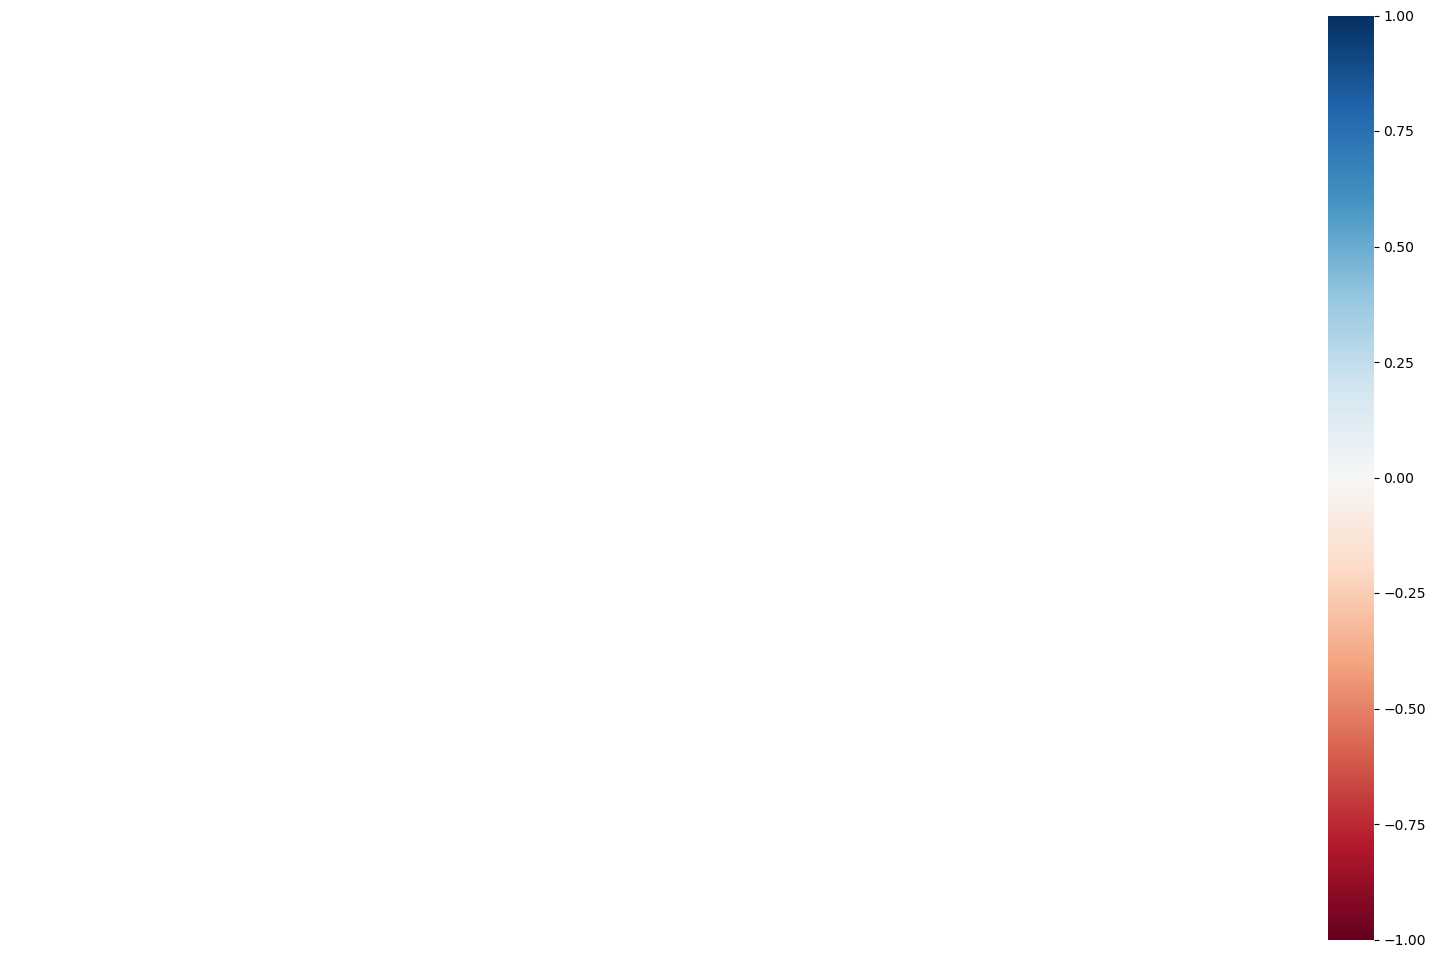

In [9]:
import missingno as msno

msno.matrix(customers)
msno.heatmap(transactions)


In [10]:
customers.drop_duplicates(inplace=True)


In [11]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [12]:
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Weekday'] = transactions['TransactionDate'].dt.weekday


In [13]:
clv = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
clv.rename(columns={'TotalValue': 'CustomerLifetimeValue'}, inplace=True)


In [14]:
transactions['PricePerUnit'] = transactions['TotalValue'] / transactions['Quantity']


In [15]:
import datetime as dt

latest_date = transactions['TransactionDate'].max()
rfm = transactions.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


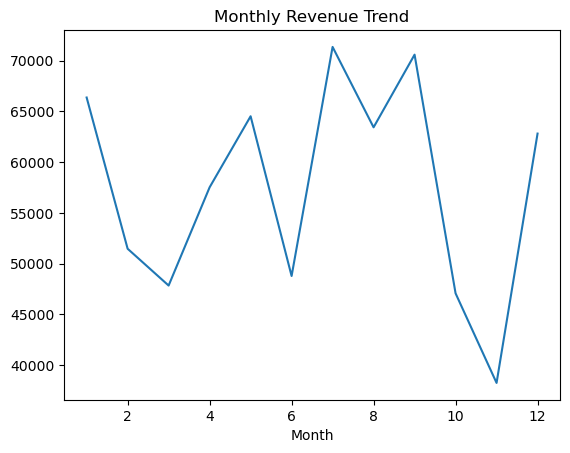

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

revenue_trend = transactions.groupby('Month')['TotalValue'].sum()
sns.lineplot(x=revenue_trend.index, y=revenue_trend.values)
plt.title('Monthly Revenue Trend')
plt.show()


<Axes: xlabel='Hour', ylabel='Weekday'>

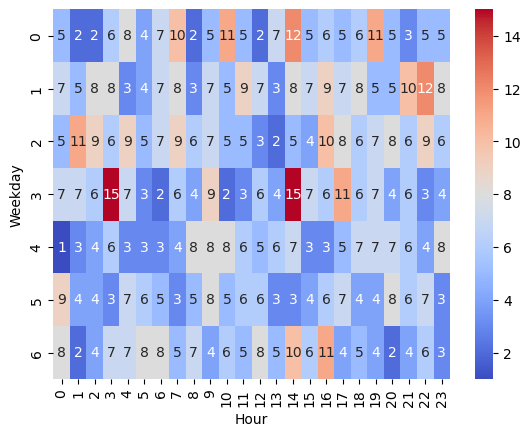

In [17]:
transactions['Hour'] = transactions['TransactionDate'].dt.hour
heatmap_data = transactions.pivot_table(index='Weekday', columns='Hour', values='TransactionID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)


<Axes: xlabel='Recency', ylabel='Monetary'>

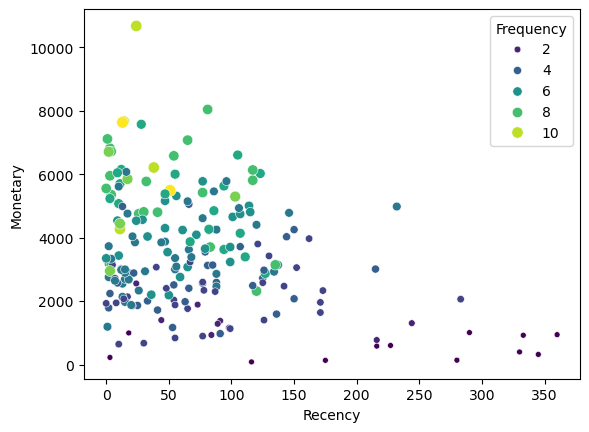

In [18]:
sns.scatterplot(data=rfm, x='Recency', y='Monetary', size='Frequency', hue='Frequency', palette='viridis')


In [20]:
from scipy.stats import f_oneway

groups = [merged_data[merged_data['Region'] == region]['TotalValue'] for region in merged_data['Region'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Results: F-statistic={f_stat}, p-value={p_value}")


ANOVA Results: F-statistic=2.019383263119273, p-value=0.10954498734772175
